In [1]:
import os
# print(os.getcwd())

os.chdir('/Users/ayman/Desktop/workspace/cubeAI')

from cubeai.cube.moves import Cube
from cubeai.test.testing_functions import do_scramble, sanitize, solved_cube, iterate_through_scrambles_for_testing

In [2]:
_cube = do_scramble(['R2', 'Fp', 'Dp', 'B', 'D2', 'Lp', 'Fp', 'D', 'F', 'R2', 'D2', 'B'])

_cube.cube_state
_cube.combo()

# _cube.seven_type_cross_solver()

[['_seven_type', 'orange', 'g', 'r'],
 ['_one_type', 'orange', 'y', 'b'],
 ['_top_type', 'yellow_b', 'b', 'g'],
 ['bottum_type', 'white_r', 'r', 'o']]

In [3]:
_combo = _cube.combo()
_combo_list = []
for i in _combo:
    _combo_list.append(i[0])
print('_combo_list: ', _combo_list)

_combo_list:  ['_seven_type', '_one_type', '_top_type', 'bottum_type']


In [4]:
_cube.three_type_cross_solver()

___________________

In [6]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.children = []    

__________________

In [7]:
solutions = []
def treeify(self, cur_moves):

    _combo_dict = {
    '_seven_type' : 'seven_type_cross_solver',
    '_three_type' : 'three_type_cross_solver',
    '_one_type' : 'one_type_cross_solver',
    '_top_type' : 'top_type_cross_solver',
    '_five_type' : 'five_type_cross_solver'
    }
    
    _combo = self.combo()
    _combo_list = []
    for i in _combo:
        _combo_list.append(i[0])

    level = []
    for _combo_type in _combo_list:
        if _combo_type != 'bottum_type':
            level.append(TreeNode(_combo_type))
    
    # print('combo types:', [[l.val, l.children] for l in level])
    # print('-----------')

    for node in level:
        node.children = getattr(self, _combo_dict[node.val])()
        node.children = sanitize(node.children)
        node.children = [TreeNode(tuple(c)) for c in node.children]

    _new_cubes = []
    for node in level:
        for c in node.children:
            # y=self
            _new_cube = do_scramble(c.val, self)
            # _new_cubes.append(_new_cube)
            c.children = [TreeNode(_new_cube)]
            _new_cube_combo = _new_cube.combo()
            _new_cube_combo_list = []
            for i in _new_cube_combo:
                _new_cube_combo_list.append(i[0])
            if _new_cube_combo_list.count('bottum_type') == 4:
                # solutions.append(cur_moves + [c.val])
                _all_moves = []
                for move_set in (cur_moves + [c.val]):
                    for sub_move in move_set:
                        _all_moves.append(sub_move)
                final_set_of_moves = _new_cube.bottum_type_cross_solver()
                if final_set_of_moves == None: # invesitage this
                    return
                solutions.append(_all_moves+final_set_of_moves[0]) # should we return solutions?
            else:
                _all_moves = []
                for move_set in (cur_moves + [c.val]):
                    for sub_move in move_set:
                        _all_moves.append(sub_move)
                if len(_all_moves) <= 6: 
                    treeify(_new_cube, cur_moves + [c.val])  # should we return solutions?

    # return _new_cubes

        


    

In [8]:
import random
moves = ['R', 'U', 'F', 'D', 'L', 'B', 'Rp', 'Up', 'Fp', 'Dp', 'Lp', 'Bp', 'R2', 'U2', 'F2', 'D2', 'L2', 'B2']
scramble = []
def generate_random_moves():
    scramble = []
    for move in range(10):
        mv = random.choice(moves)
        if move == 0:
            scramble.append(mv)
        elif move > 1 and mv[0] != scramble[-1][0]:
            scramble.append(mv)
        else:
            continue
    return scramble
print(generate_random_moves())
do_these_moves = ['R','U2','Rp','U2','D2','Bp','F','Rp','U2','D','L','R','D2','Lp','F2','B2'] # this yeilded 8

['F2', 'L2', 'B', 'Rp', 'Up', 'Rp', 'D2', 'Bp', 'Fp']


In [9]:
scramble = ['R2', 'D', 'F2', 'D2'] # why did this give

In [10]:
xyz = []
for i in range(5):
    xyz.append(generate_random_moves())
xyz

[['F2', 'B', 'L2', 'B2', 'L', 'Bp', 'F', 'D2'],
 ['Up', 'Fp', 'R', 'B', 'L2', 'Bp', 'U2'],
 ['U2', 'D2', 'Fp', 'D', 'F', 'U'],
 ['L2', 'U2', 'D', 'F', 'U2', 'F2', 'Lp'],
 ['F', 'L', 'D2', 'Rp', 'U', 'L', 'Dp', 'F']]

In [11]:
for i in iterate_through_scrambles_for_testing(xyz):
    treeify(i, [])

[[['I'], ['F', 'Fp']], [['D', 'Dp'], ['L', 'Lp']]]
[[['I'], ['F', 'Fp']], [['D', 'Dp'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
not a bottum solver case
[[['I'], ['R', 'Rp']], [['D', 'Dp'], ['R', 'Rp']]]
[[['Dp'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['D', 'Dp'], ['R', 'Rp']]]
[[['Dp'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['D', 'Dp'], ['R', 'Rp']]]
[[['Dp'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['D'], ['R', 'Rp']]]
[[['D', 'Dp'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['D', 'Dp'], ['R', 'Rp']]]
[[['Dp'], ['R', 'Rp']]]
[[['D', 'Dp'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['D', 'Dp'], ['R', 'Rp']]]
[[['Dp'], ['R', 'Rp']]]
[[['D', 'Dp'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['D2'], ['R', 'Rp']]]
[[['D', 'Dp'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['D', 'Dp'], ['R', 'Rp']], [['I'

[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['D'], ['F', 'Fp']], [['D2'], ['F', 'Fp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['D', 'Dp'], ['F', 'Fp']]]
[[['D2'], ['F', 'Fp']], [['D2'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['D2'], ['F', 'Fp']], [['D2'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['D2'], ['F', 'Fp']], [['D2'], ['F', 'Fp']]]
[[['I'

[[['D'], ['F', 'Fp']], [['D2'], ['F', 'Fp']]]
[[['D2'], ['F', 'Fp']]]
[[['D2'], ['F', 'Fp']]]
[[['Dp'], ['F', 'Fp']], [['Dp'], ['L', 'Lp']]]
[[['Dp'], ['F', 'Fp']], [['Dp'], ['L', 'Lp']]]
[[['D2'], ['R', 'Rp']], [['D2'], ['R', 'Rp']]]
[[['Dp'], ['L', 'Lp']], [['Dp'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']]]
[[['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['L', 'Lp']]]
[[['I'], ['F', 'Fp']], [['I'], ['L', 'Lp']]]
[[['I'], ['F', 'Fp']], [['I'], ['L', 'Lp']]]
[[['I'], ['F', 'Fp']], [['I'], ['L', 'Lp']]]
[[['Dp'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['D'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']], [['I'], ['L', 'Lp']]]
[[['I'], ['L', 'Lp']], [['I'], ['L', '

not a bottum solver case
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
not a bottum solver case
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
not a bottum solver case
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
not a bottum solver case
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
not a bottum solver case
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
not a bottum solver case
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
not a bottum solver case
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
not a bottum solver case
[[['D', 'Dp'], ['F', 'Fp']], [['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']

[[['D', 'Dp'], ['B', 'Bp']], [['I'], ['B', 'Bp']]]
not a bottum solver case
[[['D'], ['B', 'Bp']], [['D'], ['B', 'Bp']]]
[[['I'], ['B', 'Bp']], [['D', 'Dp'], ['B', 'Bp']]]
[[['I'], ['B', 'Bp']], [['D', 'Dp'], ['B', 'Bp']]]
[[['Dp'], ['B', 'Bp']]]
[[['I'], ['B', 'Bp']], [['D', 'Dp'], ['B', 'Bp']]]
[[['I'], ['B', 'Bp']], [['D', 'Dp'], ['B', 'Bp']]]
[[['I'], ['B', 'Bp']], [['I'], ['B', 'Bp']], [['D', 'Dp'], ['B', 'Bp']]]
[[['D', 'Dp'], ['B', 'Bp']], [['I'], ['B', 'Bp']]]
[[['D2'], ['B', 'Bp']]]
[[['I'], ['B', 'Bp']], [['I'], ['B', 'Bp']], [['D', 'Dp'], ['B', 'Bp']]]
[[['D', 'Dp'], ['B', 'Bp']], [['I'], ['B', 'Bp']]]
[[['D2'], ['B', 'Bp']]]
[[['D2'], ['B', 'Bp']]]
[[['D', 'Dp'], ['B', 'Bp']], [['I'], ['B', 'Bp']]]
[[['D2'], ['B', 'Bp']]]
[[['D', 'Dp'], ['B', 'Bp']], [['I'], ['B', 'Bp']]]
[[['D2'], ['B', 'Bp']]]
[[['I'], ['B', 'Bp']], [['D', 'Dp'], ['B', 'Bp']]]
[[['I'], ['B', 'Bp']], [['D2'], ['B', 'Bp']]]
not a bottum solver case
[[['I'], ['B', 'Bp']], [['I'], ['B', 'Bp']], [['D', 'Dp'], 

In [12]:
_cube = do_scramble(['R2', 'Fp', 'Dp', 'B', 'D2', 'Lp', 'Fp', 'D', 'F', 'R2', 'D2', 'B'])
_cube = do_scramble(['R', 'D', 'U', 'Lp', 'R', 'R', 'U']) # look at last 18 move, why did it moess up bottum?
_cube = do_scramble(scramble)


treeify(_cube, [])


[[['D'], ['R', 'Rp']], [['D'], ['R', 'Rp']], [['D2'], ['F', 'Fp']], [['D2'], ['F', 'Fp']]]
[[['D'], ['R', 'Rp']], [['D'], ['R', 'Rp']], [['D2'], ['F', 'Fp']], [['D2'], ['F', 'Fp']]]
[[['D'], ['F', 'Fp']], [['D'], ['F', 'Fp']]]
[[['I'], ['R', 'Rp']], [['D', 'Dp'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
not a bottum solver case
[[['I'], ['R', 'Rp']], [['D', 'Dp'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
not a bottum solver case
not a bottum solver case
[[['D'], ['F', 'Fp']], [['D'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['I'], ['F', 'Fp']], [['I'], ['F', 'Fp']]]
[[['Dp'], ['R', 'Rp']], [['Dp'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['I'], ['R', 'Rp']], [['I'], ['R', 'Rp']]]
[[['Dp'], 

In [13]:
# import numpy as np
solns = [[len(mvs), mvs] for mvs in solutions]
sorted_solns = sorted(solns, key=lambda x: x[0])
sorted_solns

[[4, ['Fp', 'Dp', 'F', 'D2']],
 [6, ['Rp', 'Lp', 'D2', 'B', 'Rp', 'D2']],
 [6, ['Rp', 'Lp', 'D2', 'Rp', 'B', 'D2']],
 [6, ['Lp', 'Rp', 'D2', 'B', 'Rp', 'D2']],
 [6, ['Lp', 'Rp', 'D2', 'Rp', 'B', 'D2']],
 [6, ['Dp', 'Lp', 'D', 'L', 'L', 'Dp']],
 [6, ['Dp', 'Lp', 'D', 'Lp', 'Lp', 'Dp']],
 [7, ['D2', 'F', 'U2', 'D2', 'Rp', 'F', 'D2']],
 [7, ['D2', 'F', 'L', 'D2', 'Rp', 'Fp', 'D2']],
 [7, ['D2', 'F', 'L', 'D2', 'Rp', 'Fp', 'D2']],
 [7, ['D2', 'F', 'Lp', 'B', 'D2', 'Rp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'Lp', 'B', 'D2', 'L', 'Rp', 'D2']],
 [7, ['F', 'Lp', 'B', 'D2', 'Rp', 'L', 'D2']],
 [7, ['F', 'Lp', 'B', 'D2', 'L', 'Rp', 'D2']],
 [7, ['F', 'Lp', 'B', 'D2', 'Rp', 'L', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']

In [14]:
k=[]
for i in sorted_solns:
    if i[0] <= 8:
        k.append(i)

k


[[4, ['Fp', 'Dp', 'F', 'D2']],
 [6, ['Rp', 'Lp', 'D2', 'B', 'Rp', 'D2']],
 [6, ['Rp', 'Lp', 'D2', 'Rp', 'B', 'D2']],
 [6, ['Lp', 'Rp', 'D2', 'B', 'Rp', 'D2']],
 [6, ['Lp', 'Rp', 'D2', 'Rp', 'B', 'D2']],
 [6, ['Dp', 'Lp', 'D', 'L', 'L', 'Dp']],
 [6, ['Dp', 'Lp', 'D', 'Lp', 'Lp', 'Dp']],
 [7, ['D2', 'F', 'U2', 'D2', 'Rp', 'F', 'D2']],
 [7, ['D2', 'F', 'L', 'D2', 'Rp', 'Fp', 'D2']],
 [7, ['D2', 'F', 'L', 'D2', 'Rp', 'Fp', 'D2']],
 [7, ['D2', 'F', 'Lp', 'B', 'D2', 'Rp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']],
 [7, ['F', 'Lp', 'B', 'D2', 'L', 'Rp', 'D2']],
 [7, ['F', 'Lp', 'B', 'D2', 'Rp', 'L', 'D2']],
 [7, ['F', 'Lp', 'B', 'D2', 'L', 'Rp', 'D2']],
 [7, ['F', 'Lp', 'B', 'D2', 'Rp', 'L', 'D2']],
 [7, ['F', 'L', 'D2', 'Rp', 'Fp', 'Lp', 'D2']

(array([ 1.,  0.,  6., 52., 71., 74.,  4., 19., 19., 26.]),
 array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]),
 <BarContainer object of 10 artists>)

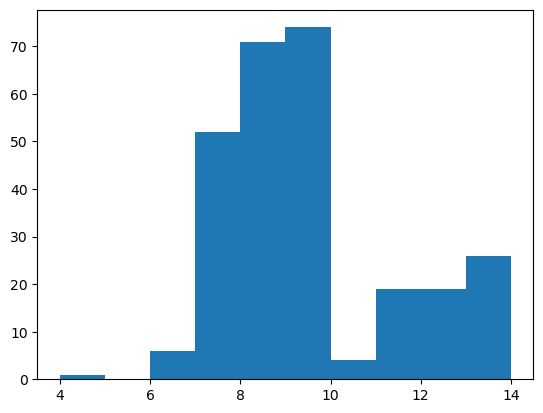

In [15]:
import matplotlib.pyplot as plt


plt.hist([x[0] for x in solns])